In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

***Flood Frequency Analysis: Calculating the 100-Year Flood Discharge***

In [12]:
# Step 1: Input annual peak discharge data (replace with your data)
data = np.array([200, 250, 180, 300, 275, 320, 150, 400, 350, 290, 310, 330, 360, 280, 410, 420, 380, 370, 340, 390])

In [13]:
# Step 2: Rank data in descending order and calculate return period
data_sorted = np.sort(data)[::-1]
rank = np.arange(1, len(data) + 1)
return_period = (len(data) + 1) / rank

In [4]:
# Step 3: Fit Gumbel distribution to the data
params = stats.gumbel_r.fit(data)  # Fit the Gumbel distribution
mu, beta = params  # Location and scale parameters

In [5]:
# Step 4: Calculate discharge for 100-year return period (T = 100)
T = 100
probability = 1 - 1 / T  # Exceedance probability
Q_100 = stats.gumbel_r.ppf(probability, mu, beta)  # Discharge for 100-year return period

In [6]:
print(f"Discharge for a 100-year return period: {Q_100:.2f} m^3/s")

Discharge for a 100-year return period: 642.81 m^3/s


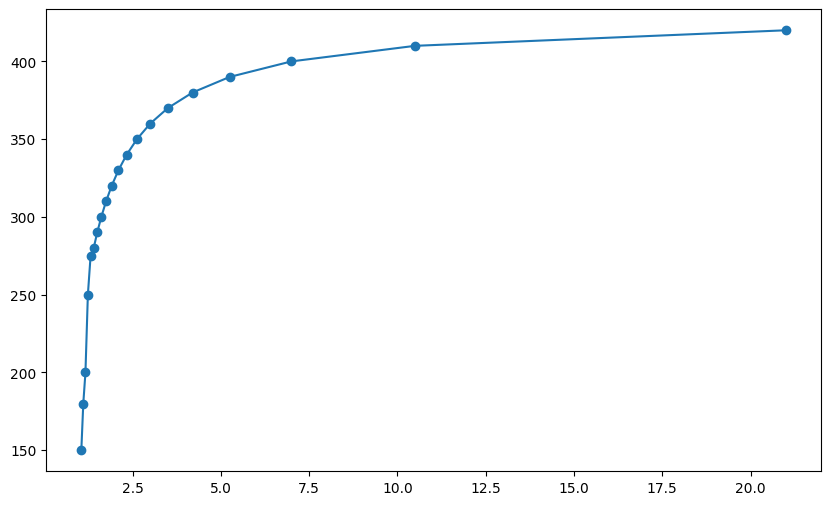

In [7]:
# Step 5: Plot data and return period curve
plt.figure(figsize=(10, 6))
plt.plot(return_period, data_sorted, 'o-', label="Observed Data")

In [8]:
# Generate theoretical return periods and corresponding discharges
theoretical_rp = np.linspace(1.01, 500, 500)  # Avoid division by zero
probabilities = 1 - 1 / theoretical_rp
theoretical_discharges = stats.gumbel_r.ppf(probabilities, mu, beta)

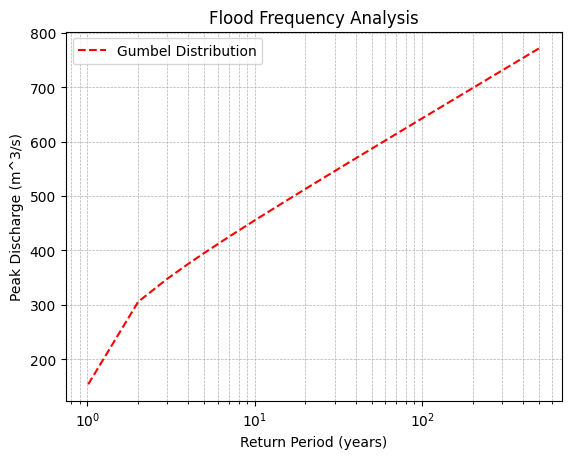

In [11]:
plt.plot(theoretical_rp, theoretical_discharges, 'r--', label="Gumbel Distribution")

# Customize plot
plt.xscale("log")
plt.xlabel("Return Period (years)")
plt.ylabel("Peak Discharge (m^3/s)")
plt.title("Flood Frequency Analysis")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()